# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [21]:
#Q2.1
import pandas as pd
gifts = pd.read_csv('./data/ForeignGifts_edu.csv')
gifts.tail()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd
28220,28221,4279700,Albert Einstein College of Medicine,Bronx,NY,43692,1024469,Monetary Gift,ISRAEL,Estate of Alfred Gertrud Sommerguth


<Axes: >

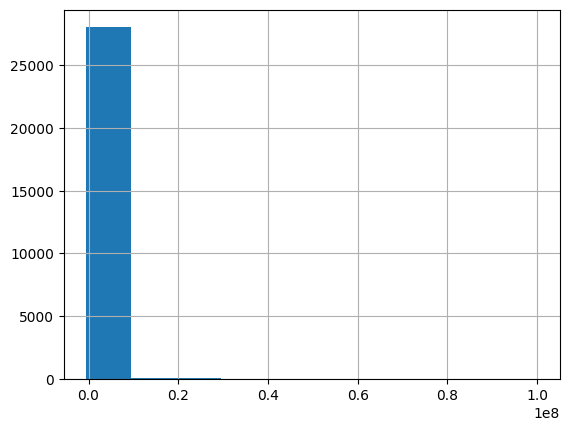

In [11]:
#Q2.2
gifts['Foreign Gift Amount'].hist()

In [13]:
gifts['Foreign Gift Amount'].describe()
#based on the histogram most of the gifts appear to be between 0 and 10 million dollars with the mean being around 588,233 dollars.

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [14]:
#Q2.3
gifts['Gift Type'].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [15]:
gifts['Gift Type'].value_counts(normalize=True)
#about 61.2% of the gifts are contracts, 38.7% are monetary gifts, and .04% are real estate.

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Foreign Gift Amount', ylabel='Density'>

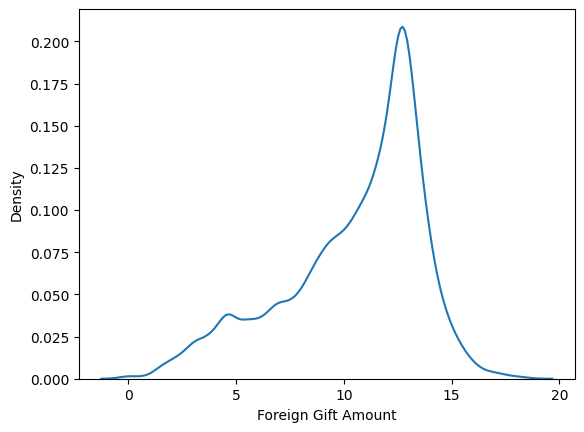

In [16]:
#Q2.4
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.kdeplot(np.log(gifts['Foreign Gift Amount']))
#there is an obvious sharp peak around 12-13, a steady biuld up from 0 to 10, and a major drop off after 15.

In [26]:
#Q2.5
gifts["Country of Giftor"].value_counts().head(15)


,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [30]:
gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [31]:
#Q2.6
gifts.groupby("Institution Name")['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

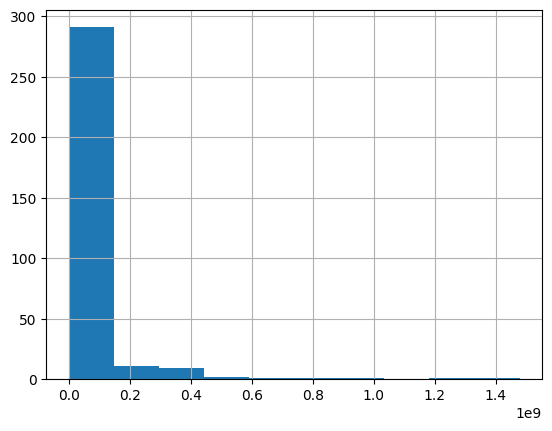

In [35]:
gifts.groupby("Institution Name")['Foreign Gift Amount'].sum().hist()

In [36]:
#Q7
gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [42]:
#Q3.1
airbnb = pd.read_csv('./data/airbnb_hw.csv')

In [43]:
#Q3.2
airbnb.shape
#30478 observations and 13 coulmns

(30478, 13)

In [44]:
airbnb.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [45]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [47]:
#Q3.3
pd.crosstab(airbnb["Property Type"],airbnb["Room Type"])
#most rentals are apartments, bed & breakfasts, condos, lofts, and houses
#in houses and bed and breakfasts, private rooms are more common to be rented than the entire property

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


<Axes: >

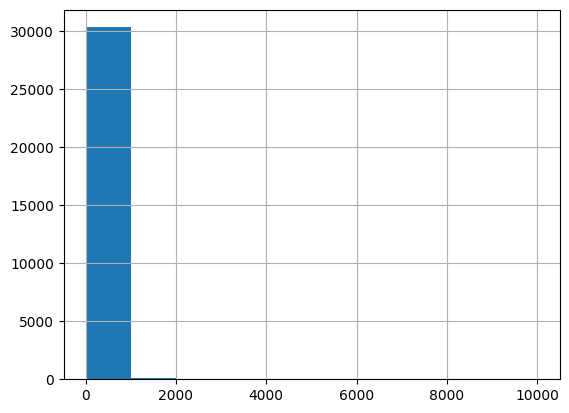

In [57]:
#Q3.4
airbnb['Price'] = airbnb['Price'].str.replace(',','').astype(float)
airbnb['Price'].hist()
#observations heavily concetrated at lower values

<Axes: xlabel='Price', ylabel='Density'>

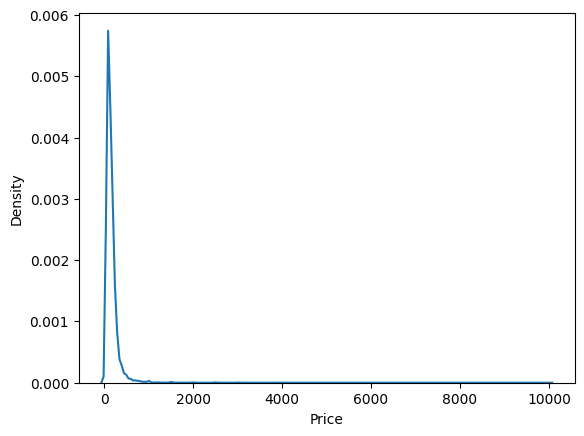

In [58]:
sns.kdeplot(airbnb['Price'])
#observations heavily concetrated at lower values

<Axes: >

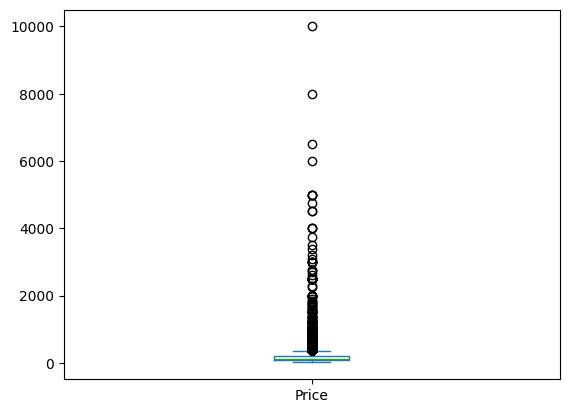

In [59]:
airbnb['Price'].plot(kind='box')
#observations heavily concetrated at lower values and many outliers

In [60]:
airbnb['Price'].describe()
#minimun of 10 and maximum of 10000 with a mean of 163.6 and median of 125

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


<Axes: >

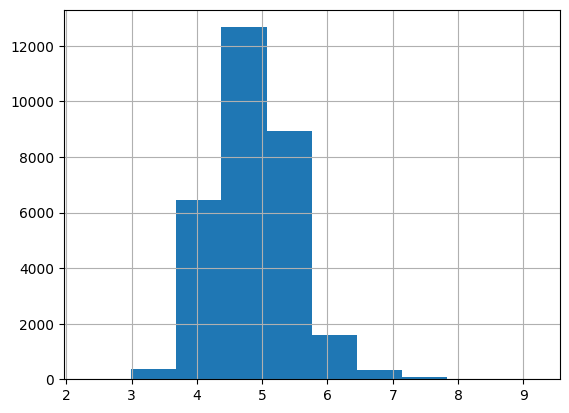

In [61]:
airbnb['price_log'] = np.log(airbnb['Price'])
airbnb['price_log'].hist()
#values better distributed and easier to understand

<Axes: xlabel='price_log', ylabel='Density'>

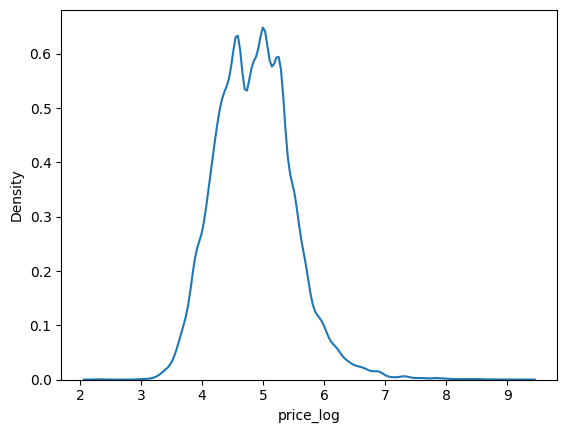

In [62]:
sns.kdeplot(airbnb['price_log'])
#much better

<Axes: >

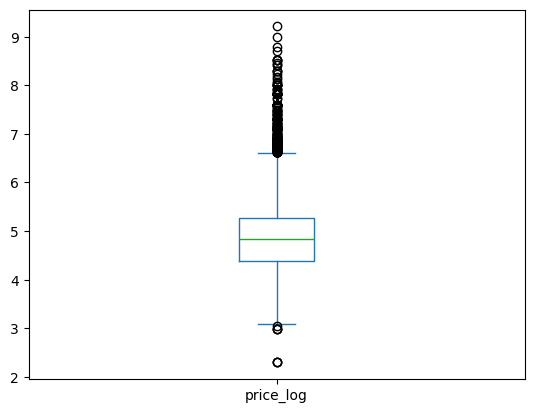

In [63]:
airbnb['price_log'].plot(kind='box')
#still quite a few outliers

In [64]:
airbnb['price_log'].describe()
#min of 2.3 and max of 9.2 with mean 4.9 and median 4.8

,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


<Axes: xlabel='Beds', ylabel='price_log'>

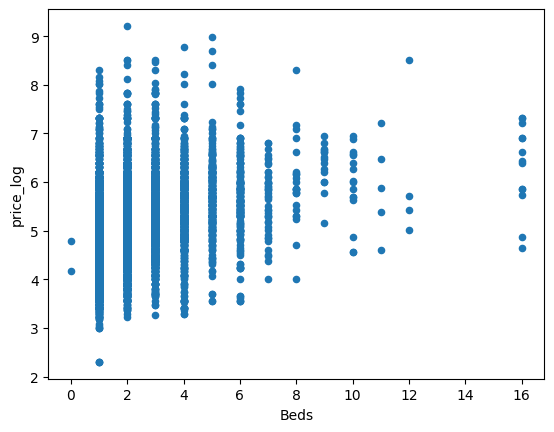

In [65]:
#Q3.5
airbnb.plot(x='Beds',y='price_log',kind='scatter')
#more concentrated at lower value suggesting fewer beds is more common
#lower number of beds also seem have a higher range of price

In [66]:
airbnb.groupby('Beds')['price_log'].describe()
#mean price seems to grow with the number of beds
#also standard deviation seems to get larger with number of beds

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20344.0,4.686977,0.539666,2.302585,4.317488,4.605170,5.043425,8.294050
2.0,6610.0,5.094504,0.580425,3.218876,4.744932,5.075174,5.416100,9.210340
3.0,2071.0,5.340837,0.644742,3.258097,4.941642,5.298317,5.703782,8.517193
4.0,783.0,5.480463,0.721360,3.295837,5.010635,5.509388,5.926926,8.779557
5.0,284.0,5.669484,0.735623,3.555348,5.245705,5.669881,6.109248,8.987197
6.0,177.0,5.651790,0.824358,3.555348,5.293305,5.616771,6.052089,7.919356
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,24.0,5.956200,0.862418,4.007333,5.495121,5.857933,6.176138,8.294050


<Axes: xlabel='Beds', ylabel='price_log'>

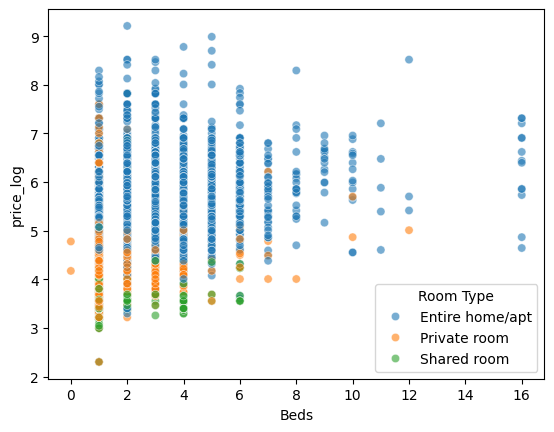

In [75]:
#Q3.6
sns.scatterplot(data=airbnb,x="Beds",y="price_log",hue="Room Type",alpha=0.6)
#entire homes/apartments appear to have the highest prices and std deviation on average

In [77]:
airbnb.groupby('Room Type')['price_log'].describe()

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Entire home/apt,17024.0,5.221858,0.514303,2.302585,4.905275,5.164786,5.480639,9.210340
Private room,12609.0,4.418420,0.414857,2.302585,4.174387,4.382027,4.605170,8.006368
Shared room,845.0,4.176785,0.547995,2.302585,3.806662,4.094345,4.442651,7.824046


<Axes: xlabel='Beds', ylabel='price_log'>

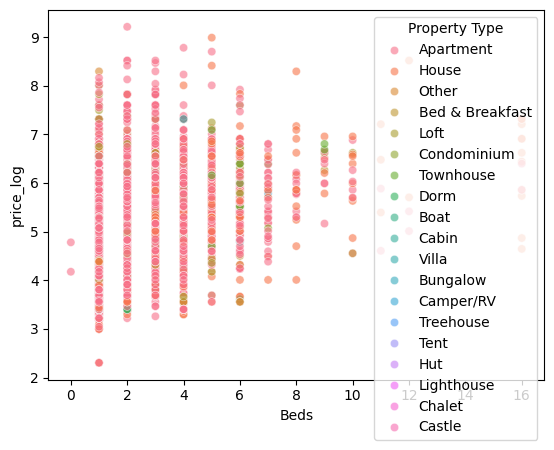

In [76]:
sns.scatterplot(data=airbnb,x="Beds",y="price_log",hue="Property Type",alpha=0.6)
#apartment and houses again apear to have the highest average prices and std deviation

In [78]:
airbnb.groupby('Property Type')['price_log'].describe()

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,27102.0,4.874189,0.602487,2.302585,4.442651,4.867534,5.273000,9.210340
Bed & Breakfast,180.0,4.511523,0.514914,3.401197,4.174387,4.471492,4.828314,6.802395
Boat,8.0,4.993387,0.300706,4.605170,4.787492,4.919475,5.184026,5.521461
Bungalow,4.0,4.972587,0.355222,4.465908,4.869437,5.075720,5.178871,5.273000
Cabin,2.0,4.951744,0.805702,4.382027,4.666885,4.951744,5.236602,5.521461
Camper/RV,7.0,4.344562,0.762250,3.663562,3.849241,3.891820,4.687122,5.783825
Castle,1.0,5.010635,NaN,5.010635,5.010635,5.010635,5.010635,5.010635
Chalet,1.0,4.595120,NaN,4.595120,4.595120,4.595120,4.595120,4.595120
Condominium,94.0,5.275793,0.701114,3.828641,4.876970,5.164786,5.699581,7.595890


I think median would be a better measure of central tendency due to the large amount of outliers we have in terms of price that drive the mean price up

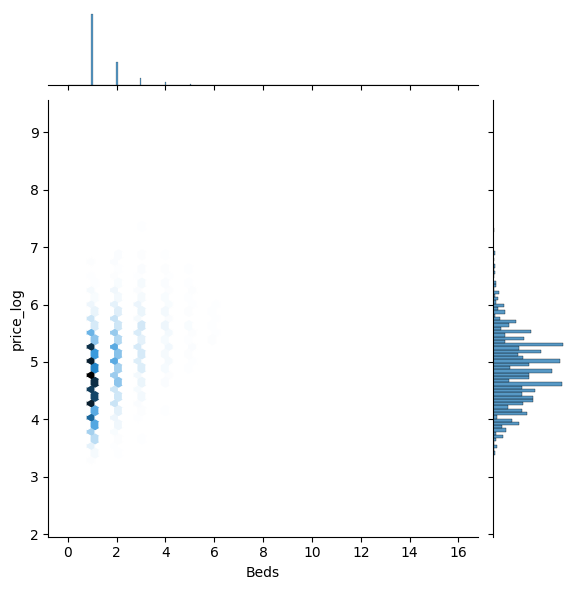

In [79]:
#Q3.7
sns.jointplot(data=airbnb,x="Beds",y="price_log",kind='hex')

#most of the data is distributed from 1-2 beds and a log price from 3.5-6
#This can make it hard to interpret previous plots with so many data points concentrated in these areas

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [82]:
#Q4.1
drill = pd.read_csv('./data/drilling_rigs.csv')
drill.shape
#there are 623 observations and 10 variables

(623, 10)

In [87]:
drill.head()
#the coulmns that include "Not Available" has been read in as objects instead of integer, so that will need to be resolved by replacing those values with NA

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [93]:
drill = drill.replace("Not Available", np.nan)

cols_to_convert = drill.columns[1:10]
drill[cols_to_convert] = drill[cols_to_convert].apply(pd.to_numeric, errors="coerce")

drill.dtypes

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),float64


In [94]:
#Q4.2
drill['time'] = pd.to_datetime(drill['Month'], format='mixed')

<Axes: xlabel='time'>

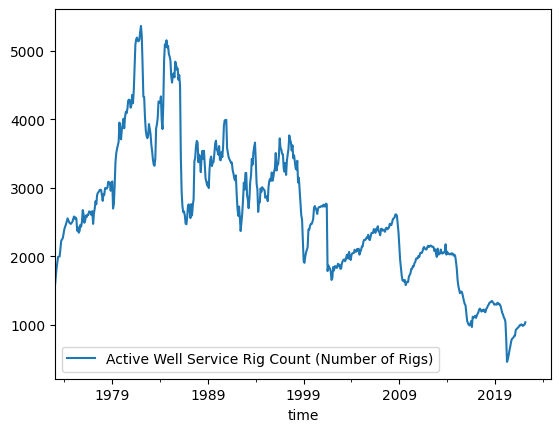

In [95]:
#Q4.3
drill.plot(x='time',y='Active Well Service Rig Count (Number of Rigs)',kind='line')
#active service wells initially increased for the first 10 years or so and have since steadily decreased over time

<Axes: xlabel='time'>

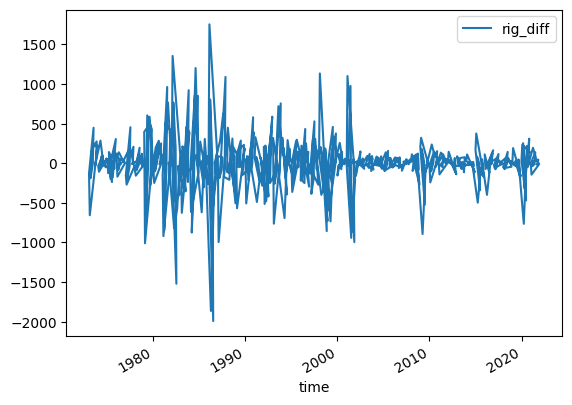

In [97]:
#Q4.4
drill["rig_diff"] = drill["Active Well Service Rig Count (Number of Rigs)"].diff()
drill.plot(x='time',y='rig_diff',kind='line')
#the number of rigs seems to have been much more erratic in the late 1900s and has been much more steady in the 21st century

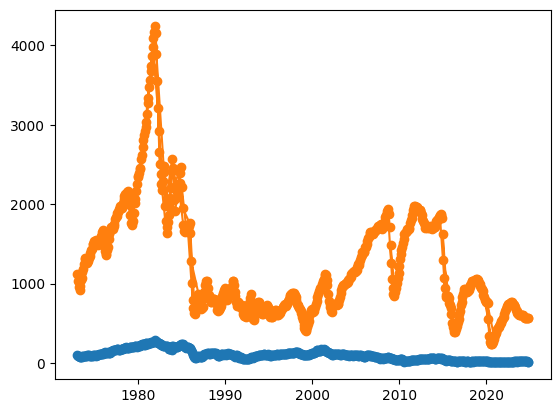

In [101]:
#Q4.5
drill_melt = pd.melt(drill, id_vars=['time'],
                     value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)','Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                     var_name='Type', value_name='Rigs')

for key, grp in drill_melt.groupby('Type'):
    plt.plot(grp['time'], grp['Rigs'], marker='o', label=key)